In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.linear_model import LinearRegression



In [3]:
df=pd.read_csv("/Users/firatyalin/Desktop/GIT/My-Data-Science-Training/ML/Data/Advertising.csv",usecols=[1,2,3,4])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
(200, 4)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


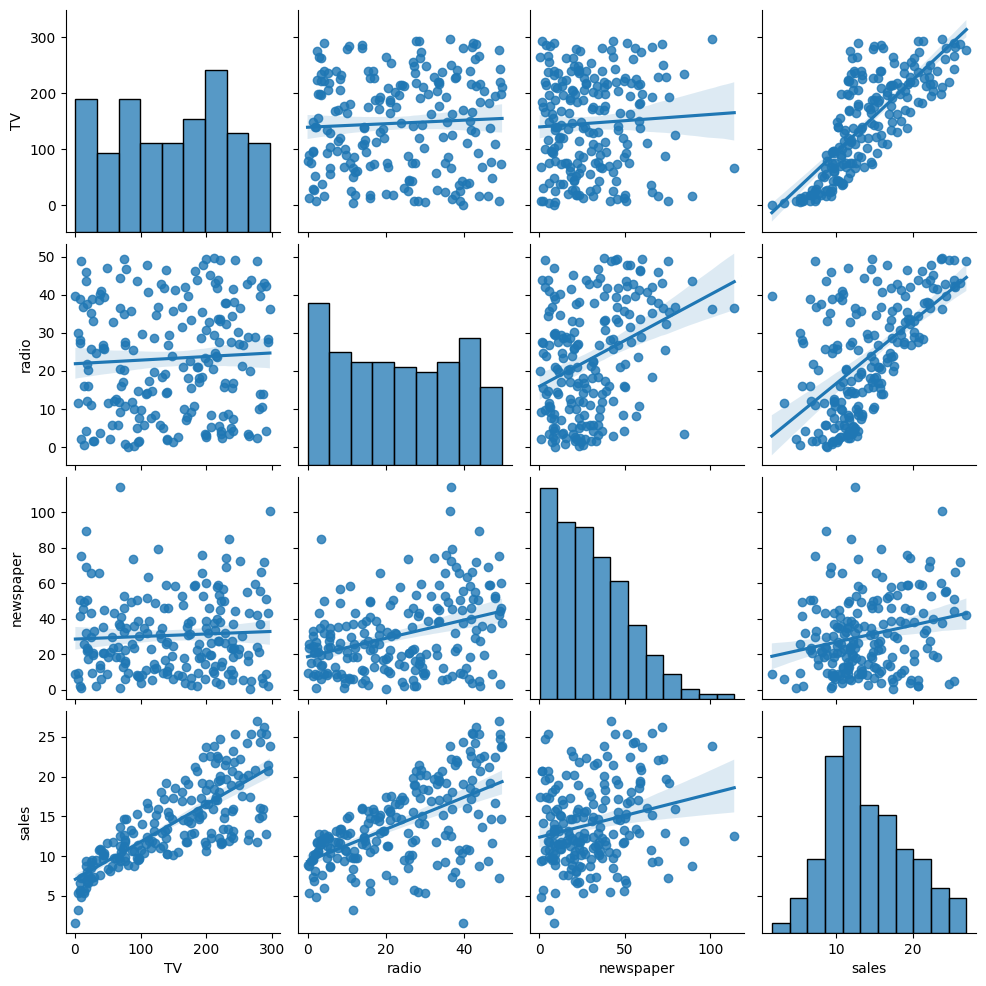

In [9]:
sns.pairplot(df,kind="reg")

In [10]:
X=df[["TV"]]

In [11]:
X=sm.add_constant(X)

In [12]:
X[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y=df[["sales"]]

In [14]:
lm=sm.OLS(y,X)

In [15]:
model=lm.fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           1.47e-42
Time:                        00:14:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [18]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [19]:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
print("f_pvalue","%.3f"%model.f_pvalue)

f_pvalue 0.000


In [21]:
print("fvalue","%.3f"%model.fvalue)

fvalue 312.145


In [22]:
print("tvalue","%.3f"%model.tvalues[0:1])

tvalue 15.360


/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_16175/2950058672.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("tvalue","%.3f"%model.tvalues[0:1])


In [23]:
model.mse_model

np.float64(3314.6181668686486)

In [24]:
model.rsquared_adj

np.float64(0.6099148238341623)

In [25]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [26]:
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [27]:
str(model.params[0])

/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_16175/4145561997.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(model.params[0])


'7.032593549127698'

In [28]:
print("Sales=" + str("%.2f"%model.params[0]) + " + TV "+"*"+str("%.2f"%model.params[1]))

Sales=7.03 + TV *0.05


/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_16175/2948583018.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Sales=" + str("%.2f"%model.params[0]) + " + TV "+"*"+str("%.2f"%model.params[1]))


In [29]:
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X, y)
model.intercept_
model.coef_

array([0.04753664])

In [30]:
model.score(X,y)

0.611875050850071

In [31]:
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [32]:
model.predict([[30]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [33]:
lm =smf.ols("sales ~ TV",df)
model= lm.fit()

In [34]:
mse=mean_squared_error(y,model.fittedvalues)

In [35]:
mse

10.512652915656757

In [36]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [37]:
reg.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [38]:
d_t=pd.DataFrame({"real":y[:10],
                 "predict":reg.predict(X)[:10]})

In [39]:
d_t["dif"]=d_t["real"]-d_t["predict"]
d_t

,real,predict,dif
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [40]:
np.sqrt(np.mean(d_t["dif"]**2))

np.float64(3.048007599996776)

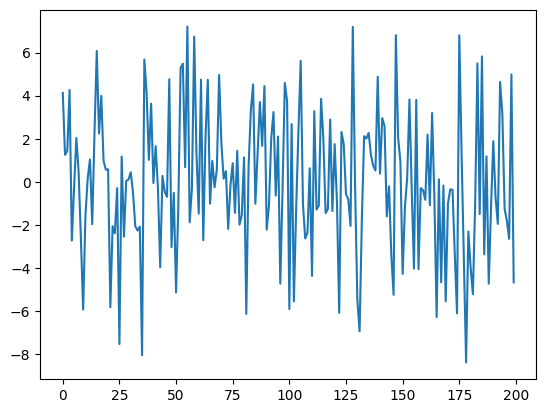

In [41]:
plt.plot(model.resid)

In [42]:
pca2=PCA()


NameError: name 'PCA' is not defined